In [1]:
# add modules folder to Python's search path
import os, sys
from pathlib import Path
script_dir = Path(os.path.dirname(os.path.abspath('')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
print(module_dir)

# import necessary modules
%matplotlib nbagg
%matplotlib inline
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import arch
import tensorflow_probability as tfp
import time  
import sim
import integrator
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.special import erf
tfd = tfp.distributions

dim = 10
n_subdivs = 100
save_folder = '../circle-fp/data/10D'

C:\Users\pinak\Documents\GitHub\fp-solvers


In [2]:
n_theta = arch.LSTMForgetNet(50, 3, tf.float32, name="circle10D")
n_theta.load_weights('{}/{}'.format(save_folder, n_theta.name)).expect_partial()
X = tf.random.uniform(shape=(10, dim))
n_theta(*tf.split(X, dim, axis=-1))

def p_inf(x, y):
    return np.exp(-(x*x + y*y - 1.)**2)

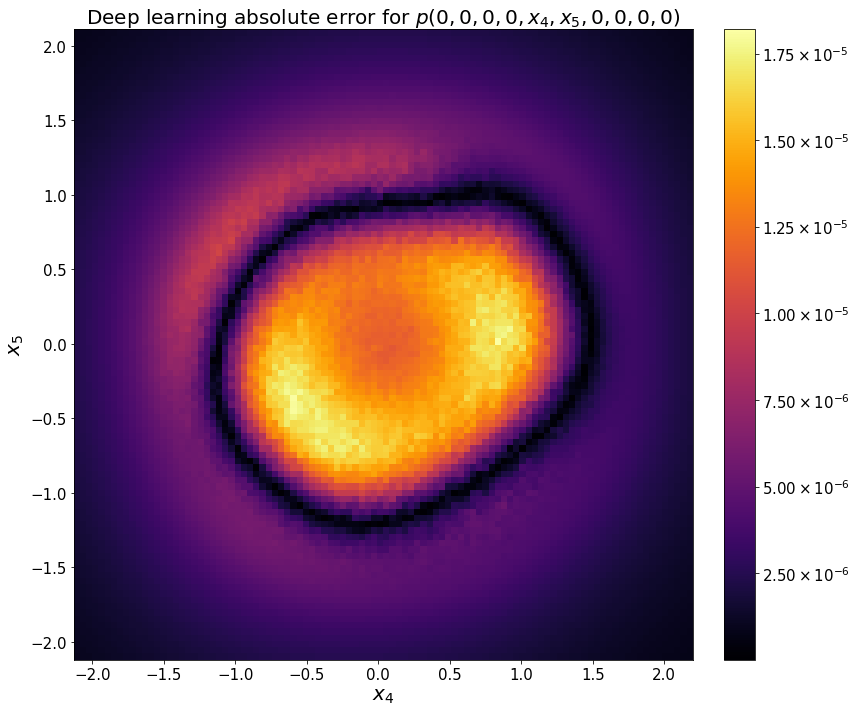

In [14]:
# set up plotting parameters
scale = 5
xlabel_size = ylabel_size = 15 + scale
tick_size = 10 + scale
legend_size = 15 + scale
title_size = 15 + scale
cbar_tick_size = 10 + scale
line_color = "darkgrey"

# formatter for colorbar
def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

# define subplots
fig_all = plt.figure(figsize=(12, 10))
ax_1l = fig_all.add_subplot(111) 
# ax_1m = fig_all.add_subplot(122)


# position colorbars
div_1 = make_axes_locatable(ax_1l)
cax_1 = div_1.append_axes('right', '5%', '5%')
# div_4 = make_axes_locatable(ax_1m)
# cax_4 = div_4.append_axes('right', '5%', '5%')


# set label size
ax_1l.tick_params(axis='both', which='major', labelsize=tick_size)
ax_1l.tick_params(axis='both', which='minor', labelsize=tick_size)
# ax_1m.tick_params(axis='both', which='major', labelsize=tick_size)
# ax_1m.tick_params(axis='both', which='minor', labelsize=tick_size)


# write titles and labels
ax_1l.set_title(r'Deep learning absolute error for $p(0, 0, 0, 0, x_4, x_5, 0, 0, 0, 0)$', fontsize=title_size)
ax_1l.set_xlabel(r'$x_4$', fontsize=xlabel_size)
ax_1l.set_ylabel(r'$x_5$', fontsize=ylabel_size)
# ax_1m.set_title('Monte Carlo absolute error', fontsize=title_size)
# ax_1m.set_xlabel(r'$x$', fontsize=xlabel_size)
# ax_1m.set_ylabel(r'$y$', fontsize=ylabel_size)
    

x = np.load('{}/x4_t.npy'.format(save_folder))
y = np.load('{}/x5_t.npy'.format(save_folder))

x_, y_ = list(map(lambda a: a.reshape(-1, 1), np.meshgrid(x, y)))
z = np.zeros_like(x_) 

p_true = p_inf(x_, y_).reshape((n_subdivs, n_subdivs))
p_true /= (p_true.sum())
p_l = np.exp(n_theta(z, z, z, z, x_, y_, z, z, z, z)).reshape((n_subdivs, n_subdivs))
p_l /= (p_l.sum()) 
    

# error_m = p
# im = ax_1m.pcolormesh(x, y, np.abs(error_m).T, cmap='inferno', shading='auto')
# cbar_1m = fig_all.colorbar(im, cax=cax_4, ax=ax_1m, format=ticker.FuncFormatter(fmt),)
# cbar_1m.ax.tick_params(labelsize=cbar_tick_size)
# ax_1m.set_aspect("auto")

error_l = p_l - p_true
im = ax_1l.pcolormesh(x, y, np.abs(error_l).T, cmap='inferno', shading='auto')
cbar_1l = fig_all.colorbar(im, cax=cax_1, ax=ax_1l, format=ticker.FuncFormatter(fmt),)
cbar_1l.ax.tick_params(labelsize=cbar_tick_size)
ax_1l.set_aspect("auto")


# plot and save
# fig_all.subplots_adjust(wspace=0.4, hspace=0.2)
# # Get the bounding boxes of the axes including text decorations
# x = 0.475
# line = plt.Line2D([x+.045,x+.045],[0.08,0.9], transform=fig_all.transFigure, color=line_color)
# fig_all.add_artist(line)
fig_all.tight_layout()
plt.savefig('../plots/10D-error.png')